# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

# ✨ Příprava dat

In [2]:
import pandas as pd
import numpy as np

Načtení dat z CSV souborů

In [3]:
intakes = pd.read_csv('intakes.csv')
outcomes = pd.read_csv('outcomes.csv')

Přehled prvních pěti řádků datasetu "intakes"

In [4]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [7]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


### Obecné informace o datasetu "intakes"
* Počet řádků datasetu: 138 585
* Počet příznaků: 12
* Datový typ příznaků... Všechny atributy mají defaultně typ object, takže v budoucnu je nutné u některých atributů změnit jejich datový typ, aby bylo možné je analyzovat.
* Můžeme si také všimnout, že atributy **Name** a **Sex upon Intake** mají chybějící hodnoty.

In [8]:
# Počet unikátních hodnot každého příznaku datasetu "intakes"
for column in intakes.columns:
    print(f'Příznak {column} má {intakes[column].nunique()} unikátních hodnot.')

Příznak Animal ID má 123890 unikátních hodnot.
Příznak Name má 23544 unikátních hodnot.
Příznak DateTime má 97442 unikátních hodnot.
Příznak MonthYear má 103 unikátních hodnot.
Příznak Found Location má 58367 unikátních hodnot.
Příznak Intake Type má 6 unikátních hodnot.
Příznak Intake Condition má 15 unikátních hodnot.
Příznak Animal Type má 5 unikátních hodnot.
Příznak Sex upon Intake má 5 unikátních hodnot.
Příznak Age upon Intake má 54 unikátních hodnot.
Příznak Breed má 2741 unikátních hodnot.
Příznak Color má 616 unikátních hodnot.


### Význam příznaků datasetu "intakes"
* Animal ID: ID určitého zvířete
* Name: Jméno určitého zvířete
* DateTime: Datum a čas, kdy bylo zvíře přijato do útulku
* MonthYear: Měsíc a rok, kdy bylo zvíře přijato do útulku
* Found Location: Místo nálezu zvířete
* Intake type: Atribut popisuje typ adopce (např. "Stray" při adopci toulavého zvířete nebo "Wildlife" při adopci divokého zvířete atd.)
* Intake Condition: Stav zvířete při přijetí do útulku
* Animal Type: Druh zvířete
* Sex upon Intake: Pohlaví zvířete při přijetí do útulku
* Age upon Intake: Věk zvířete při přijetí do útulku
* Breed: Rasa zvířete
* Color: Barva zvířete

Přehled prvních pěti řádků datasetu "outcomes"

In [9]:
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [10]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


### Obecné informace o datasetu "outcomes"
* Počet řádků datasetu: 138 769
* Počet příznaků: 12
* Datový typ příznaků... Všechny atributy mají defaultně typ object, takže v budoucnu je nutné u některých atributů změnit jejich datový typ, aby bylo možné je analyzovat.
* Můžeme si také všimnout, že atributy **Name**, **Outcome Type**, **Outcome Subtype**, **Sex upon Outcome** a **Age upon Outcome** mají chybějící hodnoty.

In [11]:
# Počet unikátních hodnot každého příznaku datasetu "outcomes"
for column in outcomes.columns:
    print(f'Příznak {column} má {outcomes[column].nunique()} unikátních hodnot.')

Příznak Animal ID má 124068 unikátních hodnot.
Příznak Name má 23425 unikátních hodnot.
Příznak DateTime má 115364 unikátních hodnot.
Příznak MonthYear má 103 unikátních hodnot.
Příznak Date of Birth má 7576 unikátních hodnot.
Příznak Outcome Type má 9 unikátních hodnot.
Příznak Outcome Subtype má 26 unikátních hodnot.
Příznak Animal Type má 5 unikátních hodnot.
Příznak Sex upon Outcome má 5 unikátních hodnot.
Příznak Age upon Outcome má 54 unikátních hodnot.
Příznak Breed má 2749 unikátních hodnot.
Příznak Color má 619 unikátních hodnot.


### Význam příznaků datasetu "outcomes"
* Animal ID: ID určitého zvířete
* Name: Jméno určitého zvířete
* DateTime: Datum a čas, kdy zvíře opustilo útulek
* MonthYear: Měsíc a rok, kdy zvíře opustilo útulek
* Date of Birth: Datum narození zvířete
* Outcome Type: Popisuje, jak zvíře opustilo útulek (např. "Relocate" při přesunu zvířete do jiného útulku)
* Outcome Subtype: Poskytuje další informace o konkrétním způsobu opuštění útulku
* Animal Type: Druh zvířete
* Sex upon Outcome: Pohlaví zvířete při opuštění útulku
* Age upon Outcome: Věk zvířete při opuštění útulku
* Breed: Rasa zvířete
* Color: Barva zvířete

Z přehledu prvních pěti řádků každého datasetu je patrné, že chybějící hodnoty jsou označeny hodnotou NaN, ale nemůžeme si být jisti, že celý dataset je konzistentní, takže pro jistotu vyplníme potenciálně prázdné hodnoty v obou datasetech hodnotou Nan.

In [12]:
intakes['Name'] = intakes['Name'].replace('', np.nan)
intakes['Sex upon Intake'] = intakes['Sex upon Intake'].replace('', np.nan)

outcomes['Name'] = outcomes['Name'].replace('', np.nan)
outcomes['Outcome Type'] = outcomes['Outcome Type'].replace('', np.nan)
outcomes['Outcome Subtype'] = outcomes['Outcome Subtype'].replace('', np.nan)
outcomes['Sex upon Outcome'] = outcomes['Sex upon Outcome'].replace('', np.nan)
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].replace('', np.nan)

Dalším krokem je odstranění opakujících se řádků datasetu, tj. duplicit.

In [13]:
intakes = intakes.drop_duplicates()
outcomes = outcomes.drop_duplicates()

display(intakes.info())
display(outcomes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 138565 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138565 non-null  object
 1   Name              97300 non-null   object
 2   DateTime          138565 non-null  object
 3   MonthYear         138565 non-null  object
 4   Found Location    138565 non-null  object
 5   Intake Type       138565 non-null  object
 6   Intake Condition  138565 non-null  object
 7   Animal Type       138565 non-null  object
 8   Sex upon Intake   138564 non-null  object
 9   Age upon Intake   138565 non-null  object
 10  Breed             138565 non-null  object
 11  Color             138565 non-null  object
dtypes: object(12)
memory usage: 13.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 138752 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138752 non-null  object
 1   Name              97502 non-null   object
 2   DateTime          138752 non-null  object
 3   MonthYear         138752 non-null  object
 4   Date of Birth     138752 non-null  object
 5   Outcome Type      138729 non-null  object
 6   Outcome Subtype   63427 non-null   object
 7   Animal Type       138752 non-null  object
 8   Sex upon Outcome  138751 non-null  object
 9   Age upon Outcome  138747 non-null  object
 10  Breed             138752 non-null  object
 11  Color             138752 non-null  object
dtypes: object(12)
memory usage: 13.8+ MB


None

Je vidět, že počet řádků v souboru dat **se snížil**, což znamená, že v souboru dat byly opakované záznamy. 

In [14]:
# Konverze kategorických příznaků na typ category
category_type_columns = ['Intake Type', 'Intake Condition', 'Animal Type']
intakes[category_type_columns] = intakes[category_type_columns].astype('category')

category_type_columns = ['Outcome Type', 'Outcome Subtype', 'Animal Type']
outcomes[category_type_columns] = outcomes[category_type_columns].astype('category')

display(intakes.info())
display(outcomes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 138565 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         138565 non-null  object  
 1   Name              97300 non-null   object  
 2   DateTime          138565 non-null  object  
 3   MonthYear         138565 non-null  object  
 4   Found Location    138565 non-null  object  
 5   Intake Type       138565 non-null  category
 6   Intake Condition  138565 non-null  category
 7   Animal Type       138565 non-null  category
 8   Sex upon Intake   138564 non-null  object  
 9   Age upon Intake   138565 non-null  object  
 10  Breed             138565 non-null  object  
 11  Color             138565 non-null  object  
dtypes: category(3), object(9)
memory usage: 11.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 138752 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         138752 non-null  object  
 1   Name              97502 non-null   object  
 2   DateTime          138752 non-null  object  
 3   MonthYear         138752 non-null  object  
 4   Date of Birth     138752 non-null  object  
 5   Outcome Type      138729 non-null  category
 6   Outcome Subtype   63427 non-null   category
 7   Animal Type       138752 non-null  category
 8   Sex upon Outcome  138751 non-null  object  
 9   Age upon Outcome  138747 non-null  object  
 10  Breed             138752 non-null  object  
 11  Color             138752 non-null  object  
dtypes: category(3), object(9)
memory usage: 11.0+ MB


None

In [15]:
# Konverze příznaku DateTime na typ datetime64
intakes['DateTime'] = pd.to_datetime(intakes['DateTime'], format='%m/%d/%Y %I:%M:%S %p')
outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'], format='%m/%d/%Y %I:%M:%S %p')

display(intakes.info())
display(outcomes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 138565 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  object        
 1   Name              97300 non-null   object        
 2   DateTime          138565 non-null  datetime64[ns]
 3   MonthYear         138565 non-null  object        
 4   Found Location    138565 non-null  object        
 5   Intake Type       138565 non-null  category      
 6   Intake Condition  138565 non-null  category      
 7   Animal Type       138565 non-null  category      
 8   Sex upon Intake   138564 non-null  object        
 9   Age upon Intake   138565 non-null  object        
 10  Breed             138565 non-null  object        
 11  Color             138565 non-null  object        
dtypes: category(3), datetime64[ns](1), object(8)
memory usage: 11.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 138752 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138752 non-null  object        
 1   Name              97502 non-null   object        
 2   DateTime          138752 non-null  datetime64[ns]
 3   MonthYear         138752 non-null  object        
 4   Date of Birth     138752 non-null  object        
 5   Outcome Type      138729 non-null  category      
 6   Outcome Subtype   63427 non-null   category      
 7   Animal Type       138752 non-null  category      
 8   Sex upon Outcome  138751 non-null  object        
 9   Age upon Outcome  138747 non-null  object        
 10  Breed             138752 non-null  object        
 11  Color             138752 non-null  object        
dtypes: category(3), datetime64[ns](1), object(8)
memory usage: 11.0+ MB


None

In [16]:
# Konverze příznaů Age upon Intake/Outcome na numerický příznak pomoci vlastní funkce "age_to_numeric"
def age_to_numeric(str):
    if pd.isna(str):
        return np.nan
    number, unit = str.split()
    number = int(number)
    if number < 0:
        return np.nan
    if "year" in unit:
        return number
    elif "month" in unit:
        return round((number / 12), 1)
    elif "week" in unit:
        return round((number / 52), 1)
    elif "day" in unit:
        return round((number / 365), 1)
    
intakes["Age upon Intake"] = intakes["Age upon Intake"].apply(age_to_numeric)
outcomes["Age upon Outcome"] = outcomes["Age upon Outcome"].apply(age_to_numeric)

In [17]:
display(intakes.info())
display(outcomes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 138565 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  object        
 1   Name              97300 non-null   object        
 2   DateTime          138565 non-null  datetime64[ns]
 3   MonthYear         138565 non-null  object        
 4   Found Location    138565 non-null  object        
 5   Intake Type       138565 non-null  category      
 6   Intake Condition  138565 non-null  category      
 7   Animal Type       138565 non-null  category      
 8   Sex upon Intake   138564 non-null  object        
 9   Age upon Intake   138557 non-null  float64       
 10  Breed             138565 non-null  object        
 11  Color             138565 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), object(7)
memory usage: 11.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 138752 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138752 non-null  object        
 1   Name              97502 non-null   object        
 2   DateTime          138752 non-null  datetime64[ns]
 3   MonthYear         138752 non-null  object        
 4   Date of Birth     138752 non-null  object        
 5   Outcome Type      138729 non-null  category      
 6   Outcome Subtype   63427 non-null   category      
 7   Animal Type       138752 non-null  category      
 8   Sex upon Outcome  138751 non-null  object        
 9   Age upon Outcome  138739 non-null  float64       
 10  Breed             138752 non-null  object        
 11  Color             138752 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), object(7)
memory usage: 11.0+ MB


None

V obou datasetech můžeme odstranit atribut **"MonthYear"**, protože tento atribut částečně duplikuje informace atributu **"DateTime"**. 

In [18]:
intakes = intakes.drop(columns=["MonthYear"])
outcomes = outcomes.drop(columns=["MonthYear"])

# 🖊️ Deskriptivní statistiky

## Popis příznaku "Age upon Intake"

* Průměrný věk zvířat při přijetí do útulku: 2.0

In [19]:
age_mean = round(intakes["Age upon Intake"].mean(), 1)
print(f'Průměrný věk zvířat při přijetí do útulku: {age_mean}')

Průměrný věk zvířat při přijetí do útulku: 2.0


* Střední hodnota věku, která odděluje polovinu zvířat s nižším věkem a polovinu s vyšším věkem při přijetí: 1.0

In [20]:
age_median = intakes['Age upon Intake'].median()
print(f"Střední hodnota věku zvířat při přijetí do útulku: {age_median}")

Střední hodnota věku zvířat při přijetí do útulku: 1.0


* Nejmladší věk zvířete při přijetí: 0.0 (tj. novorozené zvíře)
* Nejstarší věk zvířete při přijetí: 30.0

In [21]:
age_min = intakes["Age upon Intake"].min()
age_max = intakes["Age upon Intake"].max()

print(f'Nejmladší věk zvířete při přijetí: {age_min}')
print(f'Nejstarší věk zvířete při přijetí: {age_max}')

Nejmladší věk zvířete při přijetí: 0.0
Nejstarší věk zvířete při přijetí: 30.0


* Míra variability věku zvířat při přijetí: 8.2
* Míra odchylky věku od průměru: 2.9

In [22]:
age_var = round(intakes["Age upon Intake"].var(), 1)
age_std = round(intakes["Age upon Intake"].std(), 1)

print(f'Míra variability věku zvířat při přijetí: {age_var}')
print(f'Míra odchylky věku od průměru: {age_std}')

Míra variability věku zvířat při přijetí: 8.2
Míra odchylky věku od průměru: 2.9


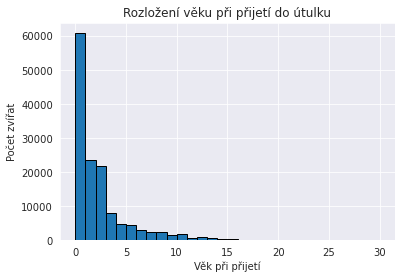

In [52]:
# Import dalšího baličku pro vykreslování grafů
import matplotlib.pyplot as plt

plt.hist(intakes['Age upon Intake'], bins=30, edgecolor='black')
plt.xlabel('Věk při přijetí')
plt.ylabel('Počet zvířat')
plt.title('Rozložení věku při přijetí do útulku')
plt.show()

Z výše uvedených statistik a histogramů je patrné, že v útulku nejčastěji končí novorozená nebo velmi mladá zvířata.

## Popis příznaku "DateTime"

Vytvoříme další atribut, který bude indikovat, který den v týdnu bylo zvíře přijato do útulku.

In [24]:
intakes["Day of Week"] = intakes['DateTime'].dt.dayofweek
map_day_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
intakes['Day of Week'] = intakes['Day of Week'].map(map_day_of_week)

In [25]:
intakes.rename(columns={"Day of Week" : "Day of Intake"}, inplace=True)

In [26]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138565 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138565 non-null  object        
 1   Name              97300 non-null   object        
 2   DateTime          138565 non-null  datetime64[ns]
 3   Found Location    138565 non-null  object        
 4   Intake Type       138565 non-null  category      
 5   Intake Condition  138565 non-null  category      
 6   Animal Type       138565 non-null  category      
 7   Sex upon Intake   138564 non-null  object        
 8   Age upon Intake   138557 non-null  float64       
 9   Breed             138565 non-null  object        
 10  Color             138565 non-null  object        
 11  Day of Intake     138565 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), object(7)
memory usage: 11.0+ MB


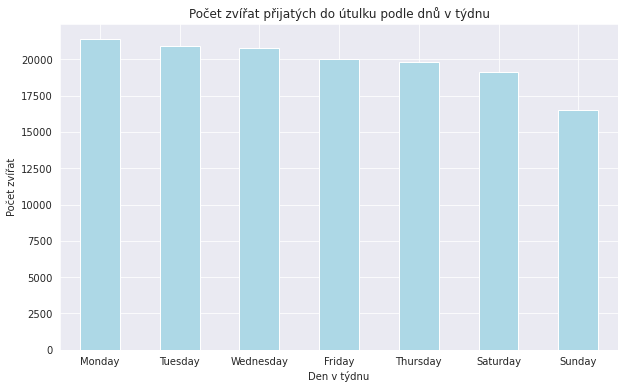

In [64]:
counts_by_day = intakes['Day of Intake'].value_counts()

plt.figure(figsize=(10, 6))
counts_by_day.plot(kind='bar', color='lightblue')
plt.xlabel('Den v týdnu')
plt.ylabel('Počet zvířat')
plt.title('Počet zvířat přijatých do útulku podle dnů v týdnu')
plt.xticks(rotation=0)
plt.show()

* Z této vizualizace lze odvodit poměrně očekávaný závěr, že nejvíce nových zvířat byla přijata do útulku na začátku pracovního týdne a s postupem pracovního týdne se počet přijíždějících zvířat snižuje.  
* Tato vizualizace by také mohla pomoci správě útulku s vypracováním rozvrhu pracovníků a rozdělením jejich pracovníků uprostřed týdne.

In [28]:
year = intakes['DateTime'].dt.year.value_counts().idxmax()
print(f'Rok s nejvyšším počtem zvířat přijatých do útulku: {year}')

month = intakes['DateTime'].dt.month.value_counts().idxmax()
print(f'Měsíc v roce s nejvyšším počtem zvířat přijatých do útulku: {"June" if month == 6 else None}')

day = intakes['Day of Intake'].value_counts().idxmax()
print(f'Den v týdnu s nejvyšším počtem zvířat přijatých do útulku: {day}')

Rok s nejvyšším počtem zvířat přijatých do útulku: 2019
Měsíc v roce s nejvyšším počtem zvířat přijatých do útulku: June
Den v týdnu s nejvyšším počtem zvířat přijatých do útulku: Monday


## Popis příznaku "Intake type" 

In [29]:
intakes.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Day of Intake
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2.0,Beagle Mix,Tricolor,Thursday
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8.0,English Springer Spaniel,White/Liver,Sunday
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,0.9,Basenji Mix,Sable/White,Thursday
3,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,0.1,Domestic Shorthair Mix,Calico,Monday
4,A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4.0,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Sunday


Unikátní hodnoty atributu **"Intake Type"**

In [30]:
intakes["Intake Type"].unique()

['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife', 'Euthanasia Request', 'Abandoned']
Categories (6, object): ['Abandoned', 'Euthanasia Request', 'Owner Surrender', 'Public Assist', 'Stray', 'Wildlife']

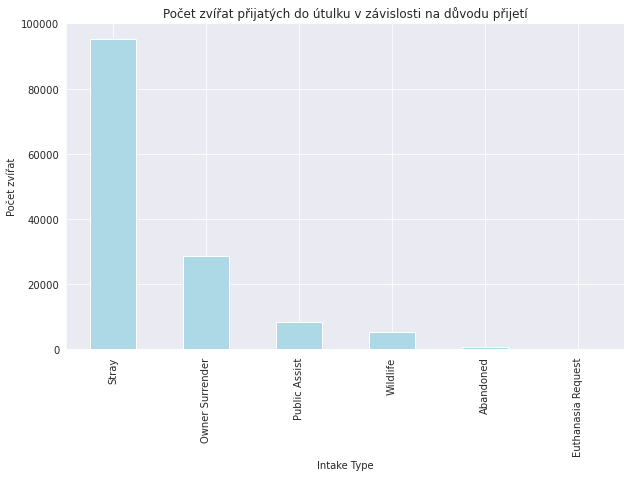

In [31]:
counts_by_day = intakes['Intake Type'].value_counts()

plt.figure(figsize=(10, 6))
counts_by_day.plot(kind='bar', color='lightblue')
plt.xlabel('Intake Type')
plt.ylabel('Počet zvířat')
plt.title('Počet zvířat přijatých do útulku v závislosti na důvodu přijetí')
plt.show()

Tato vizualizace nám ukázala, že většina přijatých zvířat byli bezdomovci. Tento výsledek nám pomůže v dalších statistikách.

In [32]:
intake_type = intakes["Intake Type"].value_counts().idxmax()
print(f'Hlavní důvod, proč jsou zvířata přivážena do útulku: {intake_type}')

Hlavní důvod, proč jsou zvířata přivážena do útulku: Stray


In [33]:
count = (intakes["Intake Type"] == "Stray").sum()
print(f'Počet toulavých zvířat přijatých do útulku: {count}')

Počet toulavých zvířat přijatých do útulku: 95275


## Popis příznaku "Intake Condition"

In [34]:
intakes["Intake Condition"].unique()

['Normal', 'Sick', 'Injured', 'Pregnant', 'Nursing', ..., 'Behavior', 'Med Urgent', 'Space', 'Med Attn', 'Panleuk']
Length: 15
Categories (15, object): ['Aged', 'Behavior', 'Feral', 'Injured', ..., 'Panleuk', 'Pregnant', 'Sick', 'Space']

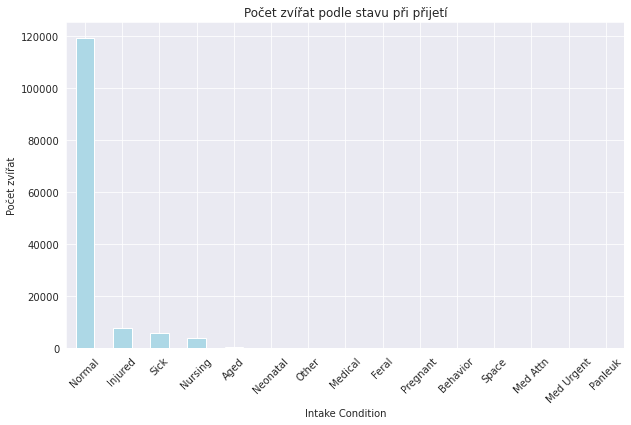

In [35]:
counts_by_day = intakes['Intake Condition'].value_counts()

plt.figure(figsize=(10, 6))
counts_by_day.plot(kind='bar', color='lightblue')
plt.xlabel('Intake Condition')
plt.ylabel('Počet zvířat')
plt.title('Počet zvířat podle stavu při přijetí')
plt.xticks(rotation=45)
plt.show()

Na první pohled se může zdát, že téměř všechna zvířata přijatá do útulku byla zcela zdravá. 
Ale následující vizualizace s využitím nového datového rámce ukazuje, že **více než 18 000** zvířat přijatých do útulku potřebovalo zvláštní péči a nejčastěji lékařskou pomoc. 

Z toho vyplývá, že v útulku by měl být v každém okamžiku přítomen pracovník, který může zvířeti v nouzi tuto speciální péči poskytnout.

In [36]:
condition_counts = intakes['Intake Condition'].value_counts()

total_animals = len(intakes)
percentage = (condition_counts / total_animals) * 100

condition_stats = pd.DataFrame({'Number of adopted animals': condition_counts.values,
                                'Percentage': percentage})

print(condition_stats)

                  Number of adopted animals  Percentage
Intake Condition                                       
Normal                               119305   86.100386
Injured                                7841    5.658716
Sick                                   5997    4.327933
Nursing                                3932    2.837657
Aged                                    463    0.334139
Neonatal                                321    0.231660
Other                                   245    0.176812
Medical                                 174    0.125573
Feral                                   125    0.090210
Pregnant                                103    0.074333
Behavior                                 49    0.035362
Space                                     4    0.002887
Med Attn                                  3    0.002165
Med Urgent                                2    0.001443
Panleuk                                   1    0.000722


## Popis příznaku "Animal Type"

Pomocí sloupcového grafu budeme analyzovat převládající typy zvířat přijatých do útulku.

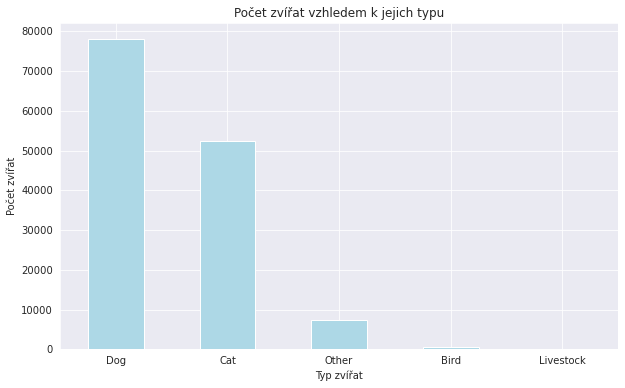

In [37]:
type_counts = intakes['Animal Type'].value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='lightblue')
plt.title('Počet zvířat vzhledem k jejich typu')
plt.xlabel('Typ zvířat')
plt.ylabel('Počet zvířat')
plt.xticks(rotation=0)
plt.show()

* Tato analýza zdůrazňuje, že útulek bude pravděpodobně muset poskytnout více prostředků na péči o psy a kočky a jejich adopci, protože tvoří většinu zvířat, která do útulku přicházejí. 
* Současně musí útulek brát v úvahu i specifické potřeby a péči o ostatní druhy zvířat.

## Popis vztahu mezi atributy "Animal Type" a "Intake Type"

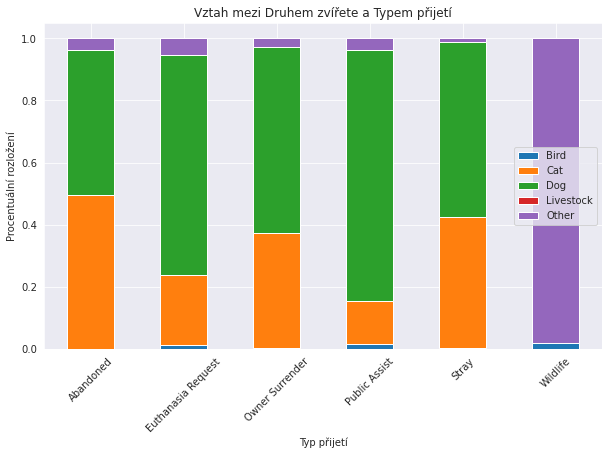

In [38]:
# Kontingenční tabulka
contingency_table = pd.crosstab(intakes['Intake Type'], intakes['Animal Type'])

# Procentuální rozdělení
percentage_distribution = contingency_table.div(contingency_table.sum(1), axis=0)

percentage_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Typ přijetí')
plt.ylabel('Procentuální rozložení')
plt.title('Vztah mezi Druhem zvířete a Typem přijetí')
plt.legend(loc='right')
plt.xticks(rotation=45)

plt.show()


* Téměř všechna zvířata s typem přijetí do útulku "Wildlife" jsou to jiná zvířata (tj. ne psi, ne kočky)
* Ostatní typy přijetí do útulku většinou sdílejí nejpopulárnější typy zvířat v útulku (psi a kočky)
* V případě typu přijetí do útulku "Abandoned" jsou kočky a psi přibližně ve stejném procentuálním poměru
* V ostatních případech převažují psi

## Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)?

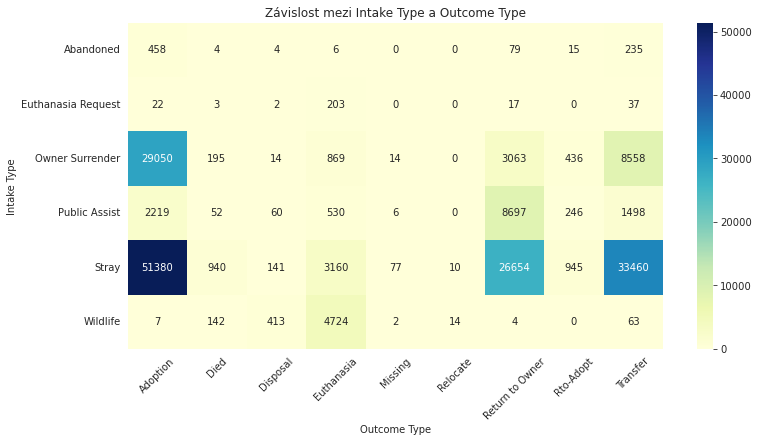

In [68]:
import seaborn as sns

# Spojíme dva datasety na zakladě atributu "Animal ID", zdroj https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html
unique_animals = pd.merge(intakes, outcomes, on="Animal ID", how="inner")

# Kontingenční tabulka
cross_tab = pd.crosstab(unique_animals["Intake Type"], unique_animals["Outcome Type"])

# Vytvoříme heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Závislost mezi Intake Type a Outcome Type")
plt.xlabel("Outcome Type")
plt.ylabel("Intake Type")
plt.xticks(rotation=45)
plt.show()

Z této vizualizace lze udělat několik zajímavých závislostí:
1) Většinu toulavých zvířat nakonec někdo adoptoval.
2) Také velké množství toulavých zvířat našlo své majitele a bylo jim vráceno.
3) Obecně platí, že většinu zvířat, která opustila útulek, někdo adoptoval

## Hraje věk zvířete roli při adopci?

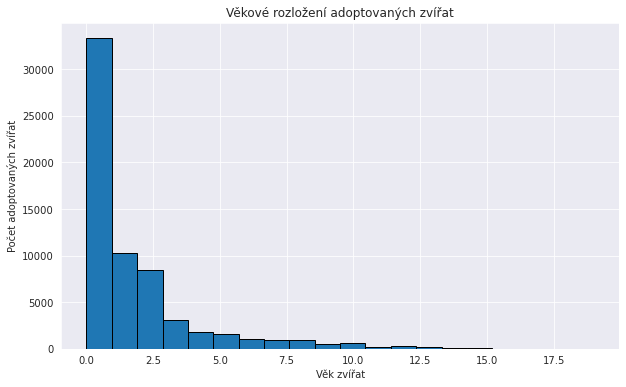

In [50]:
adopted_animals = outcomes[outcomes["Outcome Type"] == "Adoption"]

plt.figure(figsize=(10, 6))
plt.hist(adopted_animals["Age upon Outcome"], bins=20, edgecolor="k")
plt.title("Věkové rozložení adoptovaných zvířat")
plt.xlabel("Věk zvířat")
plt.ylabel("Počet adoptovaných zvířat")
plt.show()

Po analýze závislosti počtu adoptovaných zvířat na jejich věku lze zajistit, že věk hraje velkou roli. 
Koneckonců, čím mladší je zvíře, tím větší je šance, že ho někdo adoptuje.

## Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

Vytvoříme nový atribut, který bude specifikovat, ve které části roku bylo zvíře přijato do útulku.

In [60]:
intakes["The time of year"] = intakes['DateTime'].dt.month
seasons = {
    1: "Winter",
    2: "Winter",
    3: "Spring",
    4: "Spring",
    5: "Spring",
    6: "Summer",
    7: "Summer",
    8: "Summer",
    9: "Fall",
    10: "Fall",
    11: "Fall",
    12: "Winter"
}
intakes['The time of year'] = intakes['The time of year'].map(seasons)

In [61]:
intakes.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Day of Intake,The time of year
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2.0,Beagle Mix,Tricolor,Thursday,Winter
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8.0,English Springer Spaniel,White/Liver,Sunday,Summer
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,0.9,Basenji Mix,Sable/White,Thursday,Spring
3,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,0.1,Domestic Shorthair Mix,Calico,Monday,Fall
4,A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4.0,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Sunday,Summer


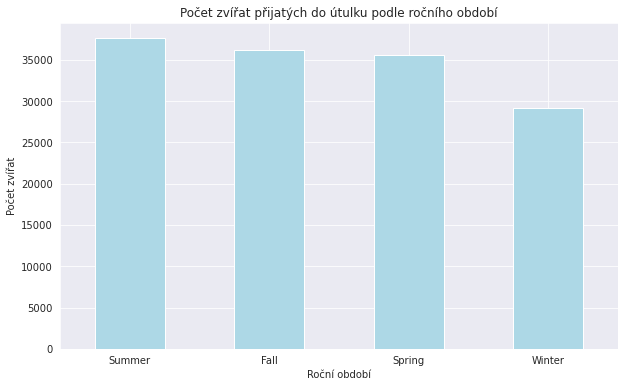

In [63]:
counts = intakes['The time of year'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='lightblue')
plt.xlabel('Roční období')
plt.ylabel('Počet zvířat')
plt.title('Počet zvířat přijatých do útulku podle ročního období')
plt.xticks(rotation=0)
plt.show()

V letním období bylo do útulku přijato nejvíce zvířat. Toto množství se výrazně liší od počtu přijatých zvířat v zimním období roku, takže přijetí zvířat do útulku během roku není konstantní.